In [1]:
from src.loader import InstanceLoader
obj_folder = "/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/segmentation"

In [1]:
t = InstanceLoader(obj_folder=obj_folder, skeleton_toml_path="skeleton.toml", pose_csv="./tracking/28/240905-1616_session28_track99_points3d.csv", obj_ref_frame=2599, obj_transform_toml=f"{obj_folder}/240905-1616_seed_session28_first.toml")

NameError: name 'InstanceLoader' is not defined

In [2]:
from src.animal import AnimalList
track_folder = "/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking"
# A = AnimalList("skeleton.toml", track_folder, session_number=28)
t = InstanceLoader(obj_folder=obj_folder,
                        skeleton_toml_path="skeleton.toml",
                        track_folder=track_folder,
                        session_number=28,
                        obj_ref_frame=2599,
                        obj_transform_toml=f"{obj_folder}/240905-1616_seed_session28_first.toml")

PosixPath('/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking/240905-1616_session28_track1_points3d.csv') generated an exception: Pose csv does not contain any valid frames


In [ ]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list)
ground_box = g.get_ground_collision()

In [3]:
t.animal_list.pre_load_ray()

In [4]:
from src.collision import CollisionDetector
c = CollisionDetector(animal_list=t.animal_list, obj_list=t.obj_list, node_of_interest=['a_L2', 'a_R2'])

In [ ]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list)
g.visualise_bounding_box()



In [ ]:
from src.visual_widget import MultiViewer
V = MultiViewer(t.animal_list, t.obj_list, 0, axis=g.tform, fps=30, hold_window=20)

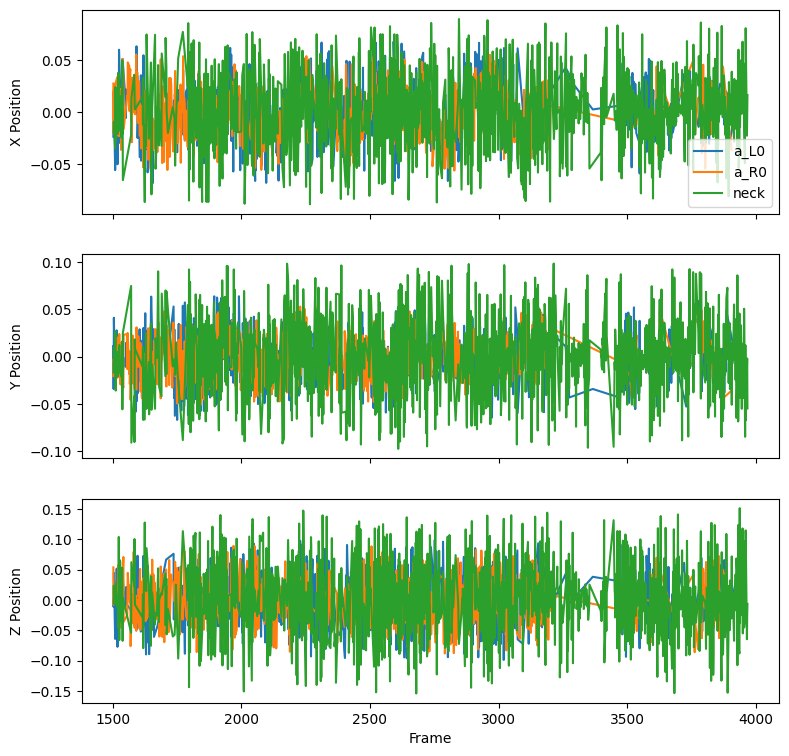

In [9]:
from scripts.tools.x_y_z_plot import KPPositionXYZ, KPVelocityXYZ, KPAccXYZ, KPDisplaceMag, KPVelocityMag, \
    KPAccelerationMag, KPDisplaceXYZ

# KP = KPPosition(t.animal_list.animals[15], node=['a_L0', 'a_R0', 'neck'])
KP = KPDisplaceXYZ(t.animal_list.animal('track27'), node=['a_L0', 'a_R0', 'neck'], filter_for_outlier=True)

/Users/persie/PycharmProjects/3d_ant_analysis/scripts/tools/time_correlation.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  position_df.loc[node_b].shift(periods=shift, axis='columns'), axis=1, drop=False)


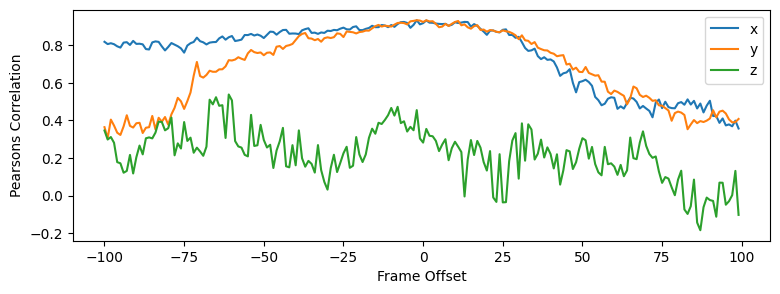

In [4]:
from scripts.tools.time_correlation import CorrelationPlot

plo = CorrelationPlot(t.animal_list.animal('track27'), 'a_R2', 'm_R1', (-100,100))